In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Read and clean df - application_data.csv

In [2]:
df = pd.read_csv("application_data.csv")
pd.set_option("display.max_columns", None)
df.shape

(307511, 122)

In [4]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
# Replace all XNA & XAP with NaN, since they are missing values, 
# to get a better understanding of the total missing values:
df.replace("XNA", np.nan, inplace=True)
df.replace("XAP", np.nan, inplace=True)
# Observed that 365243 days is an error too, since when it means 1000 years, which isn't possible.
df.DAYS_EMPLOYED.replace(365243, np.nan, inplace=True)

df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Read and clean df - previous_application.csv

In [6]:
df1 = pd.read_csv("previous_application.csv")
pd.set_option("display.max_columns", None)
df1.shape

(1670214, 37)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [8]:
# Replace all XNA & XAP with NaN, since they are missing values, 
# to get a better understanding of the total missing values:
df1.replace("XNA", np.nan, inplace=True)
df1.replace("XAP", np.nan, inplace=True)

df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,NaN,Approved,-73,Cash through the bank,NaN,NaN,Repeater,Mobile,POS,NaN,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-164,NaN,NaN,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,NaN,Approved,-301,Cash through the bank,NaN,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,NaN,Approved,-512,Cash through the bank,NaN,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Replace NaN values in rate and amount downpayment with mode, since they are important columns:
df1.AMT_DOWN_PAYMENT.fillna(df1.AMT_DOWN_PAYMENT.mode()[0], inplace=True)
df1.RATE_DOWN_PAYMENT.fillna(df1.RATE_DOWN_PAYMENT.mode()[0], inplace=True)
df1.NAME_CASH_LOAN_PURPOSE.fillna("Unknown", inplace=True)
df1.CODE_REJECT_REASON.fillna("Unknown", inplace=True)
df1.NAME_GOODS_CATEGORY.fillna("Unknown", inplace=True)

In [10]:
# Remove all columns that have more than 40% missing values, after ensuring they aren't key columns:
df = df.loc[:,(df.isnull().sum()) < (0.4*len(df))]
df1 = df1.loc[:,(df1.isnull().sum()) < (0.4*len(df1))]

In [11]:
## CLEAN df

# Replace NaN in selected categorical columns with mode:
df.CODE_GENDER.fillna(df.CODE_GENDER.mode()[0], inplace=True)

# Replace NaN in numerical columns with mean / mode / median:
df.CNT_FAM_MEMBERS.fillna(df.CNT_FAM_MEMBERS.mean(), inplace=True)
df.AMT_ANNUITY.fillna(df.AMT_ANNUITY.mean(), inplace=True)
df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.mean(), inplace=True)

# Replace NaN in other columns, with "Others"
df.NAME_TYPE_SUITE.fillna("Others", inplace=True)
df.OCCUPATION_TYPE.fillna("Others", inplace=True)
df.ORGANIZATION_TYPE.fillna("Other", inplace=True)

# Fill rest of the NaN with 0.0 since that is the mode in each of the columns:
df.fillna(0.0, inplace=True)


In [12]:
## CLEAN df1

# Replace NaN in selected categorical columns with mode:
df1.NAME_CONTRACT_TYPE.fillna(df1.NAME_CONTRACT_TYPE.mode()[0], inplace=True)
df1.NAME_YIELD_GROUP.fillna(df1.NAME_YIELD_GROUP.mode()[0], inplace=True)
df1.NAME_PAYMENT_TYPE.fillna(df1.NAME_PAYMENT_TYPE.mode()[0], inplace=True)
df1.NAME_CLIENT_TYPE.fillna(df1.NAME_CLIENT_TYPE.mode()[0], inplace=True)

# Replace NaN in other columns, with "Others"
df1.PRODUCT_COMBINATION.fillna("Others", inplace=True)

# Replace NaN in numerical columns with mean / mode / median:
df1.AMT_GOODS_PRICE.fillna(df1.AMT_GOODS_PRICE.mode()[0], inplace=True)
df1.AMT_CREDIT.fillna(df1.AMT_CREDIT.mode()[0], inplace=True)

# Drop rows where majority of the data is missing
df1 = df1[-(df1.AMT_ANNUITY.isnull())]


In [13]:
print(df.isnull().sum().sum())
print(df1.isnull().sum().sum())

0
0


In [14]:
# Drop irrelevant columns:
# Sum up total documents submitted in a new column and remove the old ones:
df["TOTAL_DOCS"] = df.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].sum(axis=1)
df.drop(df.loc[:,"FLAG_DOCUMENT_2":"FLAG_DOCUMENT_21"].columns,axis=1, inplace=True)

## New column of total unquiries made to Credit Bureau upto 1 year before application - 
## add all the "AMT_REQ_CREDIT_BUREAU" columns and delete all the columns used
df["TOTAL_CREDIT_BUREAU_ENQ"] = df.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].sum(axis=1)
df.drop(df.loc[:,"AMT_REQ_CREDIT_BUREAU_HOUR":"AMT_REQ_CREDIT_BUREAU_YEAR"].columns, axis=1, inplace=True)

df.drop("HOUR_APPR_PROCESS_START", axis=1, inplace=True)


In [15]:
# Change Days_Birth to Years
df["AGE"] = (df["DAYS_BIRTH"]/-365).astype(int) 
df.drop("DAYS_BIRTH", axis=1, inplace=True)

# Change other Days columns to years, and drop the original column
df["YEARS_EMPLOYED"] = (df["DAYS_EMPLOYED"]/-365).astype(int)
df.drop("DAYS_EMPLOYED", axis=1, inplace=True)


In [16]:
flag = list(df.columns[df.columns.str.contains("FLAG")])

def change(x):
    for c in flag:
        df.loc[:,c].replace((0,1), ("N", "Y"), inplace=True)
    return df

change(flag)
df.shape

(307511, 48)

In [17]:
# Binning - 
labels = ["Low", "Medium", "High", "Very High"]
df["SOURCE_2"] = pd.qcut(df.EXT_SOURCE_2, q = [0,0.25,0.5,0.75,1], labels=labels)
df["SOURCE_3"] = pd.qcut(df.EXT_SOURCE_3, q = [0,0.25,0.5,0.75,1], labels = labels)
labels_2 = ["Very Low", "Low", "Medium", "High", "Very High"]
df["BINNED_INCOME"] = pd.qcut(df.AMT_INCOME_TOTAL, q=[0,0.2,0.4,0.6,0.8,1], labels = labels_2)
df["BINNED_CREDIT"] = pd.qcut(df.AMT_CREDIT, q=[0,0.2,0.4,0.6,0.8,1], labels = labels_2)
df["BINNED_ANNUITY"] = pd.qcut(df.AMT_ANNUITY, q=[0,0.2,0.4,0.6,0.8,1], labels = labels_2)
df["BINNED_GOODS_PRICE"] = pd.qcut(df.AMT_GOODS_PRICE, q=[0,0.2,0.4,0.6,0.8,1], labels = labels_2)

In [18]:
# Outliers:
def outliers(x):
    plt.figure(figsize = [9,2])
    sns.boxplot(x)
    plt.show() # No outliers

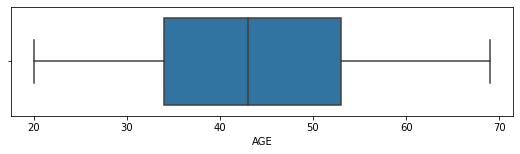

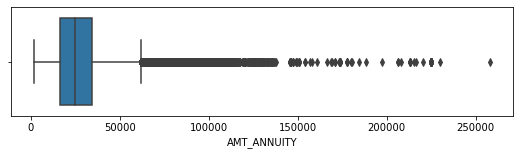

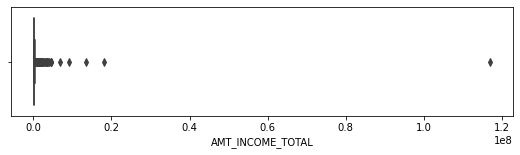

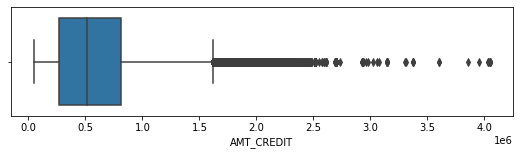

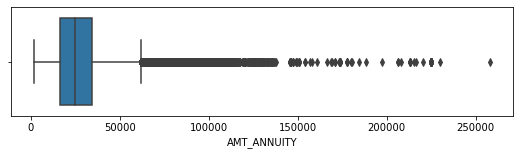

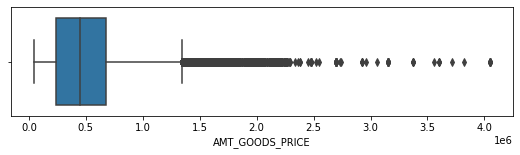

In [19]:
outliers(df.AGE)
outliers(df.AMT_ANNUITY)
outliers(df.AMT_INCOME_TOTAL)
outliers(df.AMT_CREDIT)
outliers(df.AMT_ANNUITY)
outliers(df.AMT_GOODS_PRICE)

It can be observed that for all the columns above (Except AGE), there are outliers, since there are points way past where the majority of the data lie. Therefore 95-99 percentile of the data can be taken for this analysis and rest can be dropped, for a more accurate representation. But for the purpose of this assignment, the outliers are not being dropped.

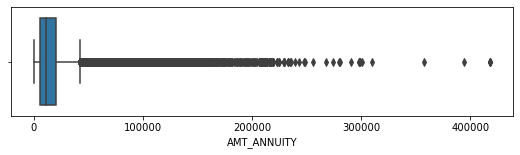

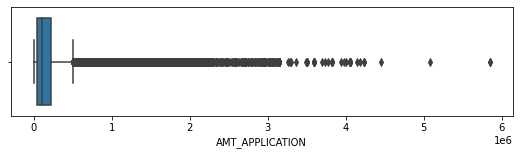

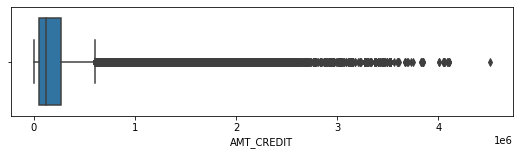

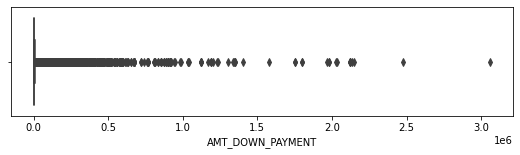

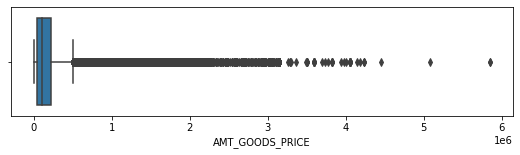

In [20]:
outliers(df1.AMT_ANNUITY)
outliers(df1.AMT_APPLICATION)
outliers(df1.AMT_CREDIT)
outliers(df1.AMT_DOWN_PAYMENT)
outliers(df1.AMT_GOODS_PRICE)

It can be observed that for all the columns above, there are outliers, since there are points way past where the majority of the data lie. Therefore 95-99 percentile of the data can be taken for this analysis and rest can be dropped, for a more accurate representation. But for the purpose of this assignment, the outliers are not being dropped.

## Data Imbalance

In [21]:
def imbalance(x):
    plt.figure(figsize=[6,6])
    counts = x.value_counts()
    counts.plot(kind="pie", autopct='%1.1f%%')
    plt.legend(bbox_to_anchor = (1.01,0.1))
    plt.show()

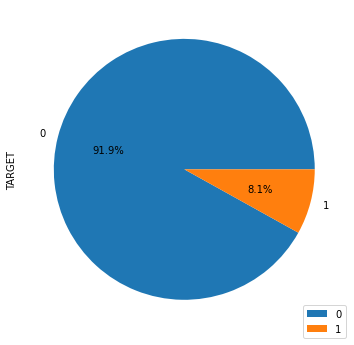

In [22]:
imbalance(df.TARGET)

There is a clear data imbalance since only 8% of the data consists of clients with payment difficulties i.e. Target 1, and the rest 92% of the data are those without payment difficulties, i.e TARGET 0.

## Splitting the data based on Targets

In [23]:
#Splitting df
defaulters = df[df.TARGET == 1]
others = df[df.TARGET == 0]

In [24]:
print(defaulters.shape)
print(others.shape)

(24825, 54)
(282686, 54)


## Univariate & sub-univariate analysis

In [25]:
def plothistogram (col):
    plt.figure(figsize=[20,3])
    plt.subplot(1,3,1)
    plt.title("Distribution of Total population")
    plt.xticks(rotation=90)
    sns.histplot(data = df, x=col, binwidth =1, color = "brown")

    plt.subplot(1,3,2)
    plt.title("Distribution of Defaulters")
    plt.xticks(rotation=90)
    sns.histplot(data=defaulters, x=col, binwidth=1, color = "red")
    
    plt.subplot(1,3,3)
    plt.title("Distribution of Others")
    plt.xticks(rotation=90)
    sns.histplot(data =others, x = col, binwidth=1, color = "orange")
   
    plt.show()
    

### Categorical Unordered Data

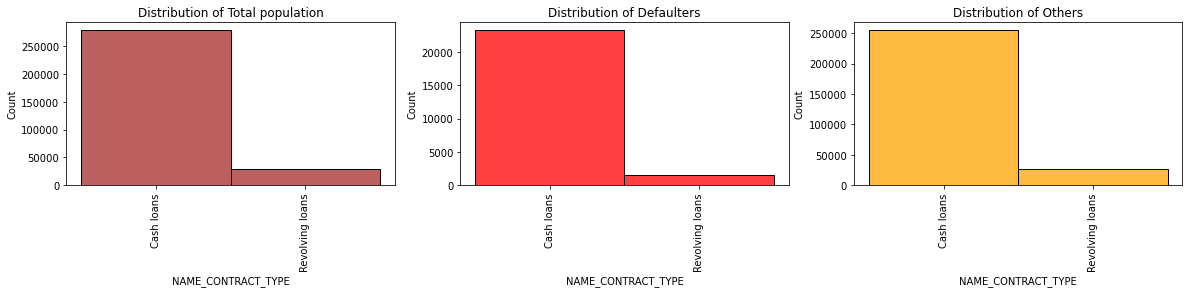

In [26]:
plothistogram("NAME_CONTRACT_TYPE")

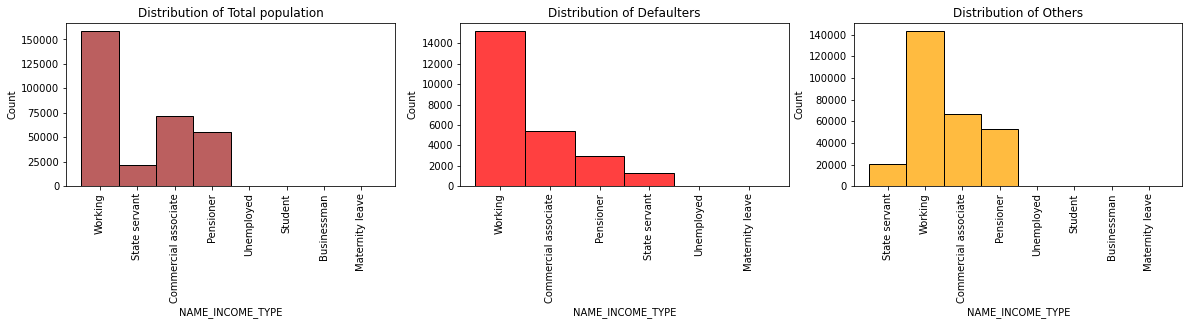

In [27]:
plothistogram("NAME_INCOME_TYPE")

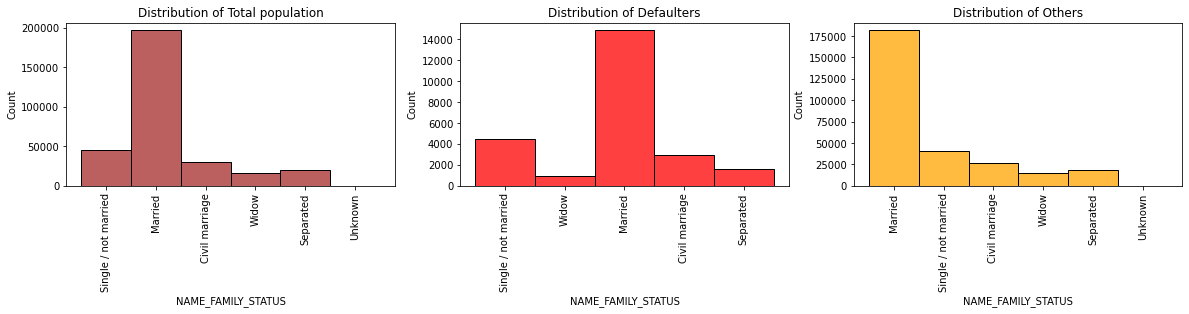

In [28]:
plothistogram("NAME_FAMILY_STATUS")

### Categorical Ordered Data

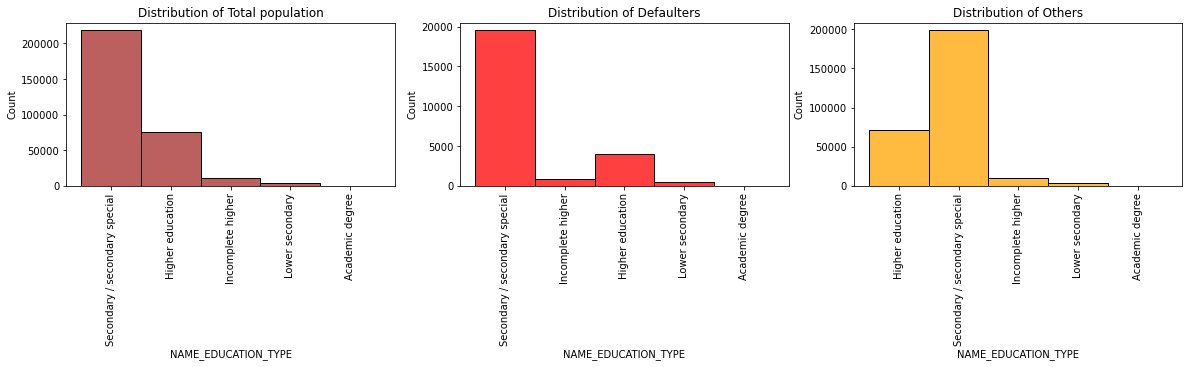

In [29]:
plothistogram("NAME_EDUCATION_TYPE")

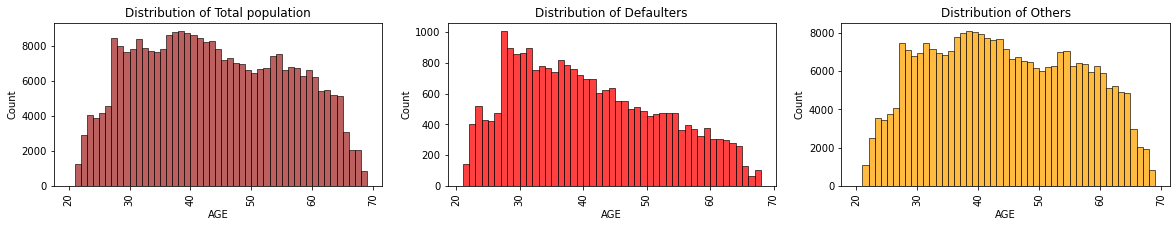

In [30]:
plothistogram("AGE")

When one looks at the distribution as per age, you can see that most of the population tested is between the age group 35-45. But when it comes to defaulters, we see a higher number of people from the age of 25-30. This could mean that those from the age of 25-35 have higher chances of defaulting.

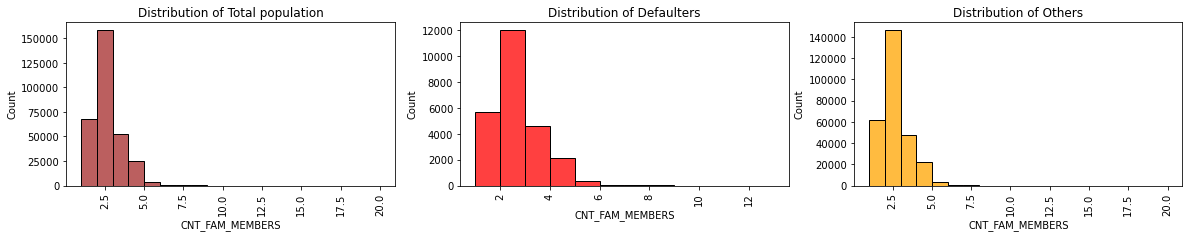

In [31]:
plothistogram("CNT_FAM_MEMBERS")

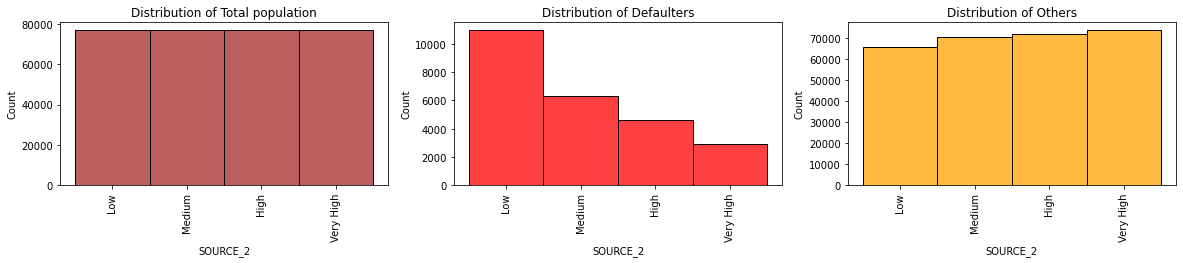

In [32]:
plothistogram("SOURCE_2")

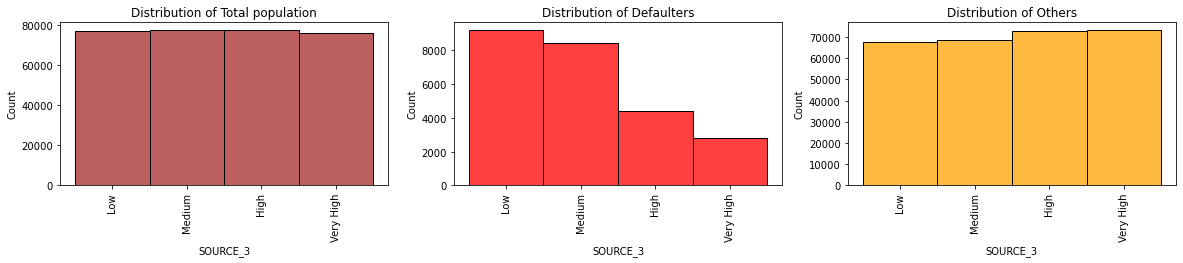

In [33]:
plothistogram("SOURCE_3")

The distribution of outside sources are fairly equal across the total population. But we see a clear distinction in the defaulters population. Those with lower scores have a higher chance of defaulting.

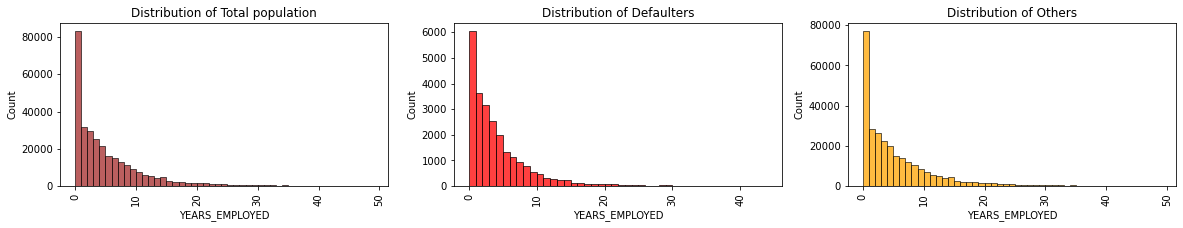

In [34]:
plothistogram("YEARS_EMPLOYED")

In all other factors, we don't see much of a difference in the distribution when comparing the combined (Total population) to the sub groups - defaulters and others.

Though the numbers might seem high with certain groups of defaulters, this could be solely because of the data imbalance, and that the data on defaulters is much higher than the data on non defaulters.

## Numerical Data (After converting them into categories (binning))

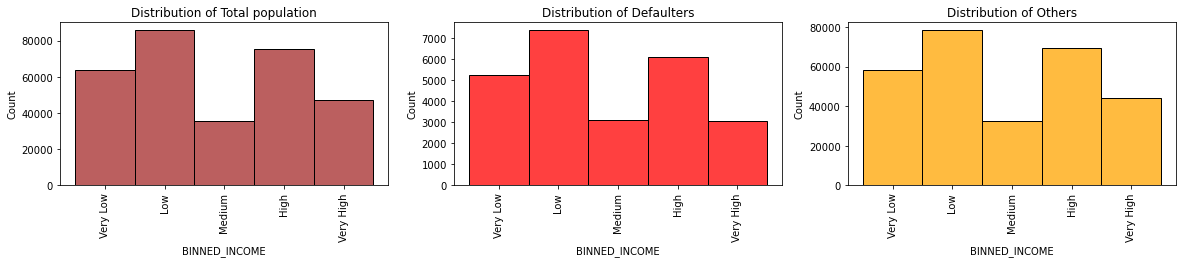

Low          0.296677
High         0.245076
Very Low     0.210473
Medium       0.124028
Very High    0.123746
Name: BINNED_INCOME, dtype: float64
Low          0.277308
High         0.245605
Very Low     0.206752
Very High    0.155812
Medium       0.114523
Name: BINNED_INCOME, dtype: float64


In [35]:
plothistogram("BINNED_INCOME")

print(defaulters.BINNED_INCOME.value_counts(normalize=True))
print(others.BINNED_INCOME.value_counts(normalize=True))

It has been observed that those of lower income groups have a higher chance of defaulting, since the percentage of low income candidates are the highest, in the defaulting data.

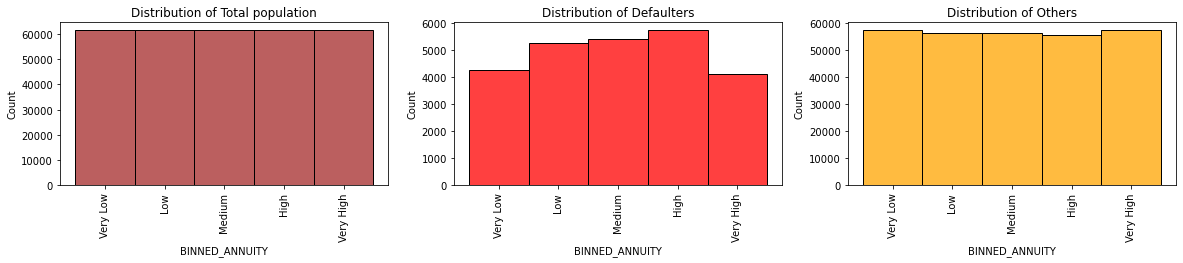

High         0.231178
Medium       0.218006
Low          0.212608
Very Low     0.172165
Very High    0.166042
Name: BINNED_ANNUITY, dtype: float64
Very High    0.202918
Very Low     0.202461
Low          0.198881
Medium       0.198655
High         0.197084
Name: BINNED_ANNUITY, dtype: float64


In [36]:
plothistogram("BINNED_ANNUITY")
print(defaulters.BINNED_ANNUITY.value_counts(normalize=True))
print(others.BINNED_ANNUITY.value_counts(normalize=True))

It has been observed that with High and Medium annuity have a higher chance of defaulting. These are clients with annuity in the range of 22,000 to 38,000 (40-80% Quantile).

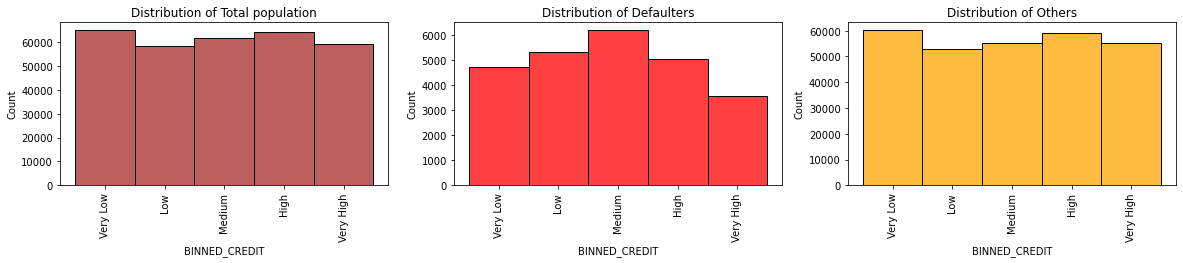

Medium       0.249305
Low          0.214663
High         0.202578
Very Low     0.189285
Very High    0.144169
Name: BINNED_CREDIT, dtype: float64
Very Low     0.213049
High         0.208694
Medium       0.195846
Very High    0.195740
Low          0.186670
Name: BINNED_CREDIT, dtype: float64


In [37]:
plothistogram("BINNED_CREDIT")
print(defaulters.BINNED_CREDIT.value_counts(normalize=True))
print(others.BINNED_CREDIT.value_counts(normalize=True))

Those with credit amounts in the range of 250,000 and 600,000 have a greater chance of defaulting than the other groups.

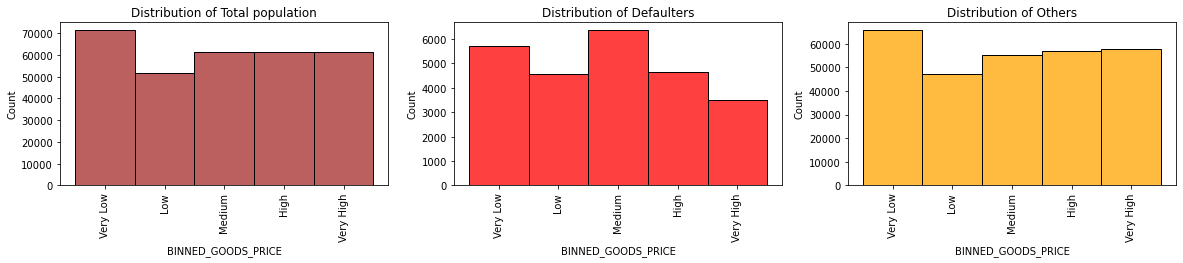

Medium       0.256556
Very Low     0.230614
High         0.187432
Low          0.183646
Very High    0.141752
Name: BINNED_GOODS_PRICE, dtype: float64
Very Low     0.232516
Very High    0.204860
High         0.200502
Medium       0.195202
Low          0.166920
Name: BINNED_GOODS_PRICE, dtype: float64


In [38]:
plothistogram("BINNED_GOODS_PRICE")
print(defaulters.BINNED_GOODS_PRICE.value_counts(normalize=True))
print(others.BINNED_GOODS_PRICE.value_counts(normalize=True))

It has been observed that those that have obtained the loan on mid level priced items (380,000 to 530,000) are more likely to default than the other groups of people.

It must be noted that due to the imbalance in data, these outcomes are not entirely reliable.

## Combined the 2 dataframes

In [39]:
df1_merged = pd.merge(df[["SK_ID_CURR", "TARGET"]], df1, how = "left", on = "SK_ID_CURR")

# Drop rows with majority missing data - 

df1_merged = df1_merged[-(df1_merged.SK_ID_PREV.isnull())]
df1_merged.isnull().sum().sum()

0

## Univariate & sub-univariate analysis

In [40]:
defaulters_df1 = df1_merged[df1_merged.TARGET == 1]
others_df1 = df1_merged[df1_merged.TARGET == 0]

In [41]:
df1_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE',
       'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [42]:
def graph (col):
    plt.figure(figsize=[15,4])
    plt.subplot(1,2,1)
    plt.title("Total distribution")
    plt.hist(data = df1_merged, x = col, align="mid", rwidth=1, label="Total", color = "navy")
    plt.subplot(1,2,2)
    plt.title("Distribution between Defaulters and Others")
    plt.hist(data = others_df1, x = col, align="left", rwidth=1, label="Others", color = "cyan")
    plt.hist(data = defaulters_df1, x = col, align="right", rwidth=1, label="Defaulters", color = "blue")
    plt.legend()
    plt.show()

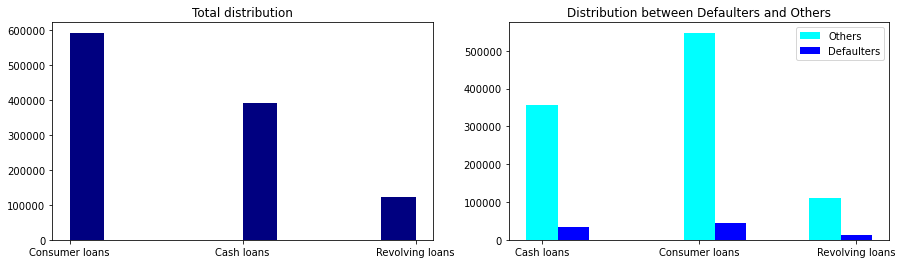

In [43]:
graph("NAME_CONTRACT_TYPE")

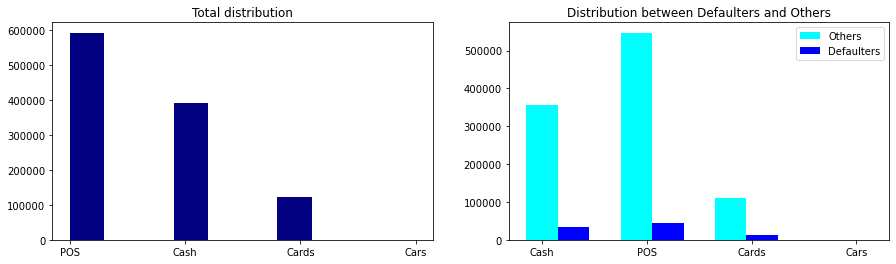

In [44]:
graph("NAME_PORTFOLIO")

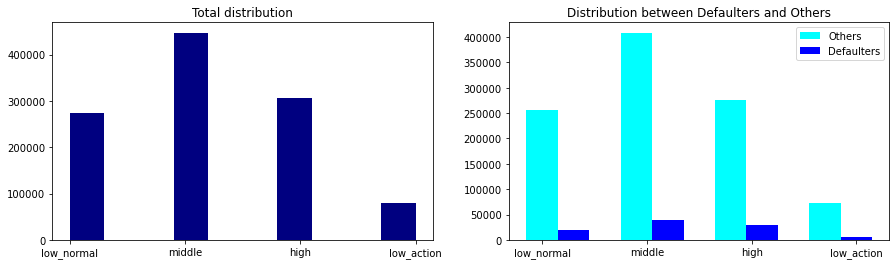

In [45]:
graph("NAME_YIELD_GROUP")

In [46]:
def hist_1 (col):
    plt.figure(figsize=[20,3])
    plt.subplot(1,3,1)
    plt.title("Distribution of Total population")
    plt.xticks(rotation=90)
    sns.histplot(data = df1_merged, x=col, binwidth =1, color = "navy")

    plt.subplot(1,3,2)
    plt.title("Distribution of Defaulters")
    plt.xticks(rotation=90)
    sns.histplot(data=defaulters_df1, x=col, binwidth=1, color = "blue")
    
    plt.subplot(1,3,3)
    plt.title("Distribution of Others")
    plt.xticks(rotation=90)
    sns.histplot(data =others_df1, x = col, binwidth=1, color = "cyan")
    plt.show()

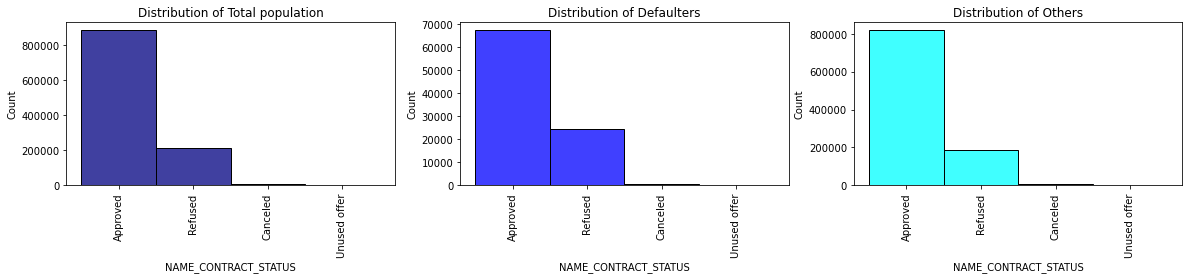

In [47]:
hist_1("NAME_CONTRACT_STATUS")

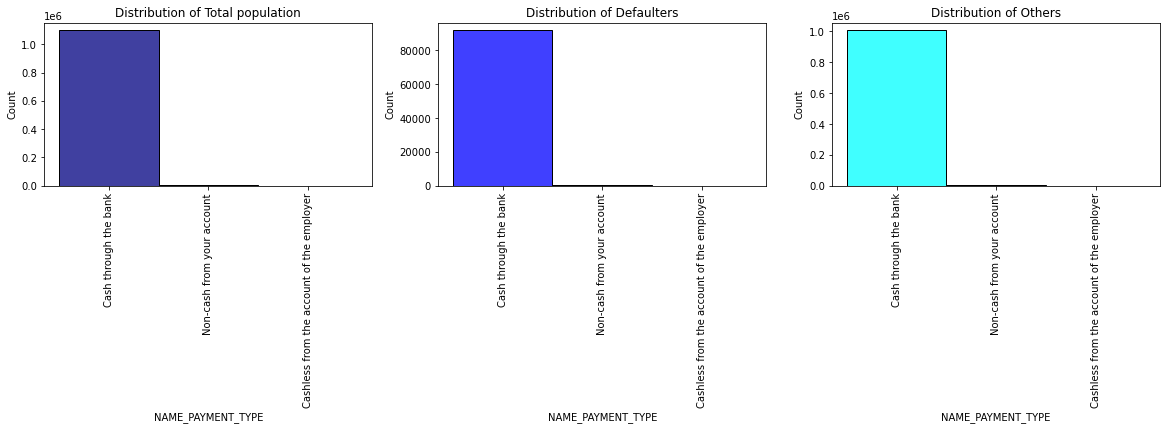

In [48]:
hist_1("NAME_PAYMENT_TYPE")

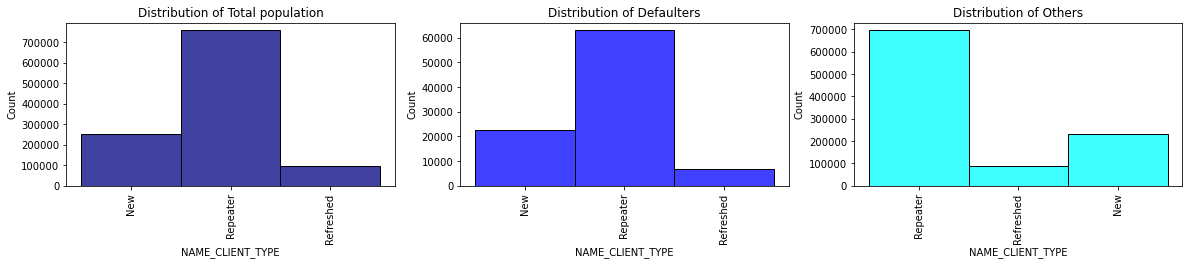

In [49]:
hist_1("NAME_CLIENT_TYPE")

In the above graphs, we may observe that there isn't much difference in the distribution between defaulters and others.

## Correlation

Below is the top 10 correlation between variables for :
1. Defaulters
2. Others

which are more or less the same for both sub-groups.

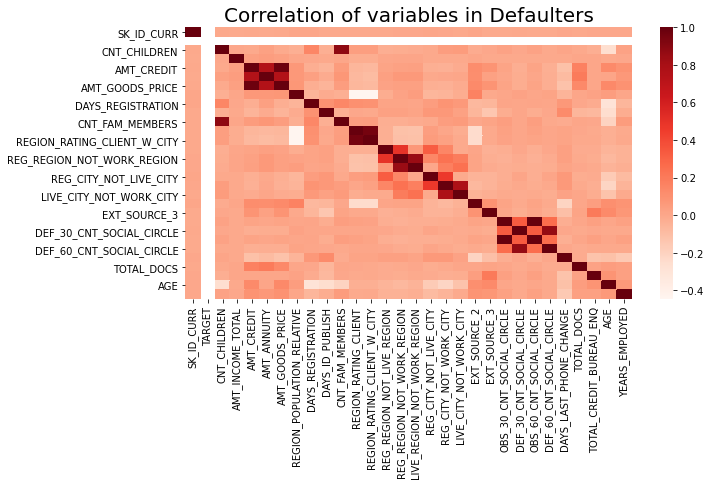

In [50]:
def_corr = defaulters.corr()
plt.figure(figsize=[10,5])
sns.heatmap(def_corr, cmap= "Reds")
plt.title("Correlation of variables in Defaulters", fontdict={"fontsize":20})
plt.show()

In [55]:
# To get the top 10 correlation variables, under "Defaulters":
defaulters.corr().unstack().drop_duplicates().sort_values(ascending=False).head(11)

SK_ID_CURR                  SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998270
AMT_CREDIT                  AMT_GOODS_PRICE                0.982566
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.956637
CNT_CHILDREN                CNT_FAM_MEMBERS                0.885484
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.869016
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.847885
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.778540
AMT_CREDIT                  AMT_ANNUITY                    0.752195
AMT_ANNUITY                 AMT_GOODS_PRICE                0.752022
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.497937
dtype: float64

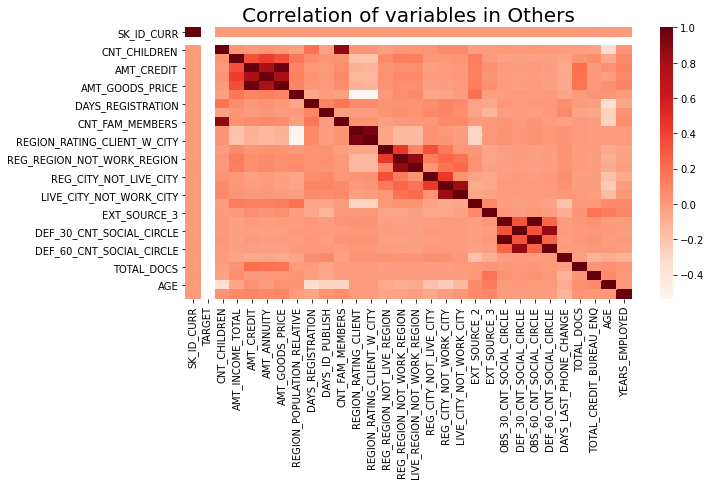

In [52]:
others_corr = others.corr()
plt.figure(figsize=[10,5])
sns.heatmap(others_corr, cmap= "Reds")
plt.title("Correlation of variables in Others", fontdict={"fontsize":20})
plt.show()

In [56]:
# To get the top 10 correlation variables, under "Others":
others.corr().unstack().drop_duplicates().sort_values(ascending=False).head(11)

SK_ID_CURR                  SK_ID_CURR                     1.000000
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE       0.998510
AMT_CREDIT                  AMT_GOODS_PRICE                0.986880
REGION_RATING_CLIENT        REGION_RATING_CLIENT_W_CITY    0.950149
CNT_CHILDREN                CNT_FAM_MEMBERS                0.878570
REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    0.861861
DEF_30_CNT_SOCIAL_CIRCLE    DEF_60_CNT_SOCIAL_CIRCLE       0.859371
REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY        0.830381
AMT_ANNUITY                 AMT_GOODS_PRICE                0.776251
AMT_CREDIT                  AMT_ANNUITY                    0.771297
REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION     0.446101
dtype: float64

### Conclusion:
#### Due to data imbalance the outcomes aren't conclusive. But some of the key factors observed are :

##### Age:
Those between the age of 25-35 have higher chances of defaulting. Considering they may not have a steady a income or a job, it does make them likely to default.

##### External sources 1 & 3:
Those with lower ratings from external sources have higher chances of defaulting. 

##### Amount of Annuity:
Clients with middle to higher annuity payments have a higher chance of defaulting. The range of annuity is from 22,000 to 38,000.

##### Income:
Customers part of the lower income group, have a higher chance of defaulting. It is likely that lower income groups won't have the capacity to repay loans.